In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

In [2]:
#loading the dataset
anime_data = pd.read_csv('DATA/anime_cleaned.csv', index_col =0)

In [3]:
anime_data.head(2)

,title,genre,synopsis,producer,studio,rating,scoredby,members,source,aired
1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space","In the year 2071, humanity has colonized sever...",Bandai Visual,Sunrise,8.81,363889,704490,Original,"Apr 3, 1998 to Apr 24, 1999"
2,Cowboy Bebop Tengoku no Tobira,"Action, Space, Drama, Mystery, Sci-Fi","Another day, another bounty—such is the life o...","Sunrise, Bandai Visual",Bones,8.41,111187,179899,Original,"Sep 1, 2001"


In [4]:
#droping the columns that won't be used
anime_data = anime_data.drop(columns=['genre','synopsis','producer','studio','source'])
anime_data.head(2)

,title,rating,scoredby,members,aired
1,Cowboy Bebop,8.81,363889,704490,"Apr 3, 1998 to Apr 24, 1999"
2,Cowboy Bebop Tengoku no Tobira,8.41,111187,179899,"Sep 1, 2001"


In [5]:
#checking the shape after dropping the null values
anime_data.shape

(3185, 5)

In [6]:
#checking out the aired column
anime_data['aired']

1        Apr 3, 1998 to Apr 24, 1999
2                        Sep 1, 2001
3        Apr 1, 1998 to Sep 30, 1998
4        Jul 2, 2002 to Dec 24, 2002
5        Apr 6, 2005 to Mar 19, 2008
                    ...             
3181                Apr 1, 2018 to ?
3182    Apr 12, 2018 to Jun 28, 2018
3183     Apr 2, 2018 to Jun 18, 2018
3184                    Nov 25, 2018
3185      Jan 5, 2019 to May 4, 2019
Name: aired, Length: 3185, dtype: object

In [7]:
#a function to remove the month
def clean_up_month(s):
  new_s = re.sub(r"Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec|to|Not|available","",str(s))

#r"[^\sa-zA-Z0-9\.\,\;\!\-]","",str(s)
# return re.sub(r"[^\sa-zA-Z0-9\.\,\;\!\-]","",str(s))
  return new_s

In [8]:
#removing month from the aired column
anime_data['aired'] = anime_data['aired'].apply(clean_up_month)

In [9]:
#checking the column to see if the characters were removed
anime_data['aired'].head()

1     3, 1998   24, 1999
2                1, 2001
3     1, 1998   30, 1998
4     2, 2002   24, 2002
5     6, 2005   19, 2008
Name: aired, dtype: object

In [10]:
#function to remove commas joined with a number
def clean_up_comma(s):
  new_s = re.sub('[\,\?]',"",str(s))
  return new_s

In [11]:
#applying the clean comma function to the aired column
anime_data['aired'] = anime_data['aired'].apply(clean_up_comma)
anime_data['aired']

1         3 1998   24 1999
2                   1 2001
3         1 1998   30 1998
4         2 2002   24 2002
5         6 2005   19 2008
               ...        
3181              1 2018  
3182     12 2018   28 2018
3183      2 2018   18 2018
3184               25 2018
3185       5 2019   4 2019
Name: aired, Length: 3185, dtype: object

In [12]:
# creating a function to split the values in the aired column by ' '
def split_column(x):
  return x.split(' ')

In [13]:
#splting the elements in the aired column by space
anime_data['aired'] = anime_data['aired'].apply(split_column)
anime_data['aired']

1        [, 3, 1998, , , 24, 1999]
2                      [, 1, 2001]
3        [, 1, 1998, , , 30, 1998]
4        [, 2, 2002, , , 24, 2002]
5        [, 6, 2005, , , 19, 2008]
                   ...            
3181               [, 1, 2018, , ]
3182    [, 12, 2018, , , 28, 2018]
3183     [, 2, 2018, , , 18, 2018]
3184                  [, 25, 2018]
3185      [, 5, 2019, , , 4, 2019]
Name: aired, Length: 3185, dtype: object

In [14]:
anime_data['aired'][1]

['', '3', '1998', '', '', '24', '1999']

In [15]:
#writing a function to remove all empty spaces in the list
def remove_empty(x):
    for i in x:
        if i == '':
            index = x.index(i)
            del x[index]
    return x        

In [16]:
anime_data['aired'] = anime_data['aired'].apply(remove_empty)

In [17]:
anime_data['aired'][1]

['3', '1998', '', '24', '1999']

In [18]:
#to further ensure removal of all empty elements
anime_data['aired'] = anime_data['aired'].apply(remove_empty)

In [19]:
anime_data['aired'][1]

['3', '1998', '24', '1999']

In [20]:
#writing a function that will remove elements in the column that is not a year
def not_year(x):
    for i in x:
        if (int(i) <= 1900) or (i== '?'):
            index = x.index(i)
            del x[index]
    return x

In [21]:
anime_data['aired'] = anime_data['aired'].apply(not_year)

In [22]:
anime_data['aired'][:5]

1    [1998, 1999]
2          [2001]
3    [1998, 1998]
4    [2002, 2002]
5    [2005, 2008]
Name: aired, dtype: object

In [23]:
# function that only picks the first year in each row
def pick_one(x):
        if len(x) > 1:
            x = x[0]
        elif len(x) == 1:
            x = x[0]
        return x

In [24]:
anime_data['aired'] = anime_data['aired'].apply(pick_one)

In [25]:
anime_data['aired'].head()

1    1998
2    2001
3    1998
4    2002
5    2005
Name: aired, dtype: object

In [26]:
#getting the unique years in the aired column
def unique_year(x):
    unique = []
    for i in x:
        if i not in unique:
            unique.append(i)
    return unique

In [27]:
b = unique_year(anime_data['aired'])
b

['1998',
 '2001',
 '2002',
 '2005',
 '2004',
 '1999',
 '2003',
 '1995',
 '1997',
 '1996',
 '1988',
 '1993',
 '2000',
 '1979',
 '1989',
 '1991',
 '1985',
 '1986',
 '1994',
 '1992',
 '1990',
 '1973',
 '2006',
 '1987',
 '1984',
 '1983',
 '1980',
 '1982',
 '1977',
 '1981',
 '2007',
 '1971',
 '1969',
 '1974',
 '1975',
 '2008',
 '1972',
 '1970',
 '1978',
 '1963',
 '2009',
 '2010',
 '2012',
 '2011',
 '2016',
 '2013',
 '2014',
 '2015',
 '2017',
 '2018',
 '2019']

As you can see from the unique values there are empty list, so they have to be removed. That is why unique() attribute could not be used to get the unique values

In [28]:
#a function that removes empty list
def remove_empty_list(x):
    if x != []:
        return x

In [29]:
anime_data['aired'] =  anime_data['aired'].apply(remove_empty_list)
anime_data['aired']

1       1998
2       2001
3       1998
4       2002
5       2005
        ... 
3181    2018
3182    2018
3183    2018
3184    2018
3185    2019
Name: aired, Length: 3185, dtype: object

In [30]:
print(anime_data['aired'].nunique())
anime_data['aired'].unique()

51


array(['1998', '2001', '2002', '2005', '2004', '1999', '2003', '1995',
       '1997', '1996', '1988', '1993', '2000', '1979', '1989', '1991',
       '1985', '1986', '1994', '1992', '1990', '1973', '2006', '1987',
       '1984', '1983', '1980', '1982', '1977', '1981', '2007', '1971',
       '1969', '1974', '1975', '2008', '1972', '1970', '1978', '1963',
       '2009', '2010', '2012', '2011', '2016', '2013', '2014', '2015',
       '2017', '2018', '2019'], dtype=object)

In [31]:
anime_data.dtypes

title        object
rating      float64
scoredby      int64
members       int64
aired        object
dtype: object

In [32]:
#converting the type of aired column to int
anime_data['aired'] = anime_data['aired'].astype('int')

In [33]:
anime_data.dtypes

title        object
rating      float64
scoredby      int64
members       int64
aired         int64
dtype: object

In [34]:
#viewing the data
anime_data.head(3)

,title,rating,scoredby,members,aired
1,Cowboy Bebop,8.81,363889,704490,1998
2,Cowboy Bebop Tengoku no Tobira,8.41,111187,179899,2001
3,Trigun,8.31,197451,372709,1998


In [35]:
#a dataframe for the count of unique years
year_count = pd.DataFrame(anime_data.groupby('aired')['aired'].count())
year_count.rename(columns = {'aired':'count'}, inplace =True)
year_count = year_count.reset_index()
year_count.tail()

,aired,count
46,2015,234
47,2016,263
48,2017,220
49,2018,79
50,2019,1


In [36]:
year_count.head()

,aired,count
0,1963,1
1,1969,1
2,1970,1
3,1971,1
4,1972,2


#  Calculating the weighted average of each anime in our data

Using the Weighted Average Formula AND the members column based on popularity
WR = (RV + Cm/V+m) where:
- V is the number of votes
- m is minimum votes required to be listed
- R is rating average of the anime
- C is mean vote across whole report

In [37]:
#finding the weighted average for each anime
V = anime_data['scoredby']                       #number of votes for each anime
R = anime_data['rating']                     #average voting rating for each anime
C = anime_data['rating'].mean()              #mean vote across the whole report
m = anime_data['scoredby'].quantile(0.80)        #minimum votes requires to be among the top 

anime_data['weighted_avg'] = ((R*V)+(C*m))/(V+m)     #used by imdb to calculate weighted average of movies

In [38]:
anime_data.head(2)

,title,rating,scoredby,members,aired,weighted_avg
1,Cowboy Bebop,8.81,363889,704490,1998,8.602928
2,Cowboy Bebop Tengoku no Tobira,8.41,111187,179899,2001,8.016863


In [39]:
#showing the top 10 anime with the highest weighted average
total_anime = anime_data.copy()
wavg = total_anime.sort_values('weighted_avg', ascending = False)
wavg.head()

,title,rating,scoredby,members,aired,weighted_avg
1358,Fullmetal Alchemist Brotherhood,9.25,730784,1194518,2009,9.109469
2766,Kimi no Na wa.,9.19,467437,724490,2016,8.984706
1629,Steins;Gate,9.14,561405,1005781,2011,8.970440
1785,Hunter x Hunter 2011,9.11,400879,716409,2011,8.884161
1127,Code Geass Hangyaku no Lelouch R2,8.95,541989,788845,2008,8.792127


# Recommending Anime according to the best in their year group using the combination of weighted average ratings, members and popularity

In [40]:
#normalizing the weighted average and popularity column

from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()

### Defining all the functions that will help with this recommendation

In [41]:
#function to create group dataframes 
def create_group(first,last):
    group = pd.DataFrame(anime_data.loc[(anime_data['aired'] >= first) & (anime_data['aired'] <= last)])
    #changing the index to allow for easy joining of the dataframes later
    group.index = [x for x in range(group.shape[0])]
    return group

In [42]:
#function to normalize the weighted average, popularity and membrs
def norm(group):
    data_scaled = min_max_scaler.fit_transform(group[['weighted_avg','members']])
    data_norm = pd.DataFrame(data_scaled, columns = ['weighted_avg','members'])
    return data_norm

In [43]:
#function to create a score value that splits scaled weighted_avg, popularity and members
def create_score(group,data_norm):
    group[['norm_weighted_avg','norm_members']] = data_norm
    group['score'] = group['norm_weighted_avg']*0.5 + group['norm_members']*0.5
    data_scored = group.sort_values(['score'], ascending=False)
    return data_scored

In [44]:
#a function to show normalized features and the new score  feature
def show_normalized(data):
    return data[['title','norm_weighted_avg','norm_members','score']].head()

In [45]:
#a function to plot the top anime according to a split between weighted avg, members and popularity
def plot(data,first,last):
    plt.figure(figsize=(18,8))

    ax = sns.barplot(x = data['score'].head(10), y = data['title'].head(10), data = data, palette='Set2')


    plt.title('Best anime between years {} and {}'.format (first,last), weight = 'bold')
    plt.xlabel('Score', weight = 'bold')
    plt.ylabel('Anime Title', weight = 'bold')

#plt.savefig('scored.png')

### Group1 recommendation (1960 to 1979)

In [46]:
group_1 = create_group(1960,1979)
group_1.shape

(19, 6)

In [47]:
data_norm_1 = norm(group_1)

In [48]:
data_scored_1 = create_score(group_1,data_norm_1)

In [49]:
show_normalized(data_scored_1)

,title,norm_weighted_avg,norm_members,score
0,Mobile Suit Gundam,0.966683,1.000000,0.983342
2,Versailles no Bara,1.000000,0.641660,0.820830
4,Lupin III,0.539173,0.687803,0.613488
13,Ashita no Joe,0.495822,0.402287,0.449055
14,Doraemon 1979,0.349467,0.261710,0.305588


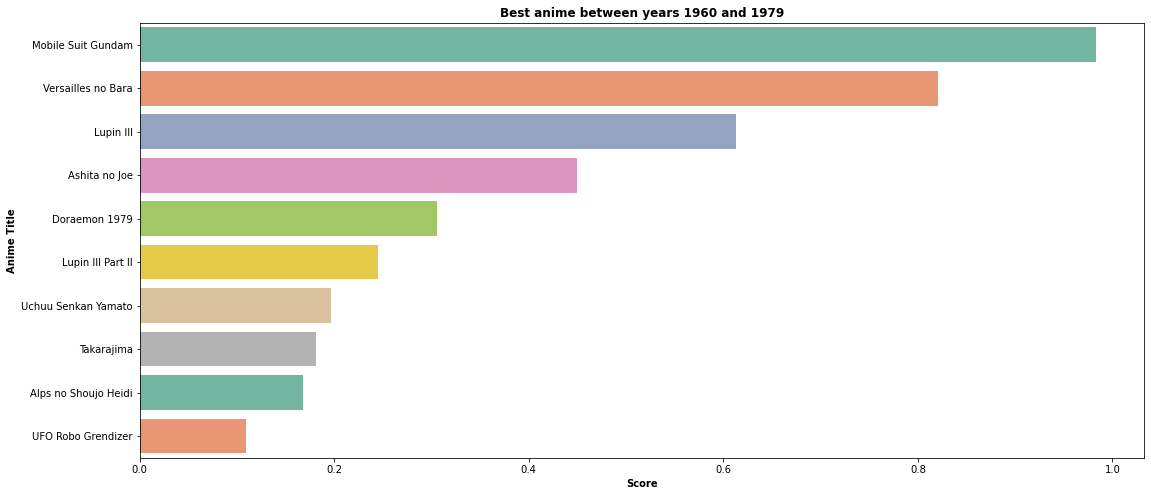

In [50]:
plot(data_scored_1,1960,1979)

### Group2 recommendation (1980 to 1989)

In [51]:
group_2 = create_group(1980,1989)
group_2.shape

(111, 6)

In [52]:
data_norm_2 = norm(group_2)

In [53]:
data_scored_2 = create_score(group_2,data_norm_2)

In [54]:
show_normalized(data_scored_2)

,title,norm_weighted_avg,norm_members,score
15,Tonari no Totoro,1.000000,0.911018,0.955509
7,Dragon Ball,0.798971,1.000000,0.899486
0,Akira,0.756120,0.696179,0.726150
17,Kaze no Tani no Nausica,0.863084,0.421480,0.642282
5,Ranma,0.413867,0.300138,0.357003


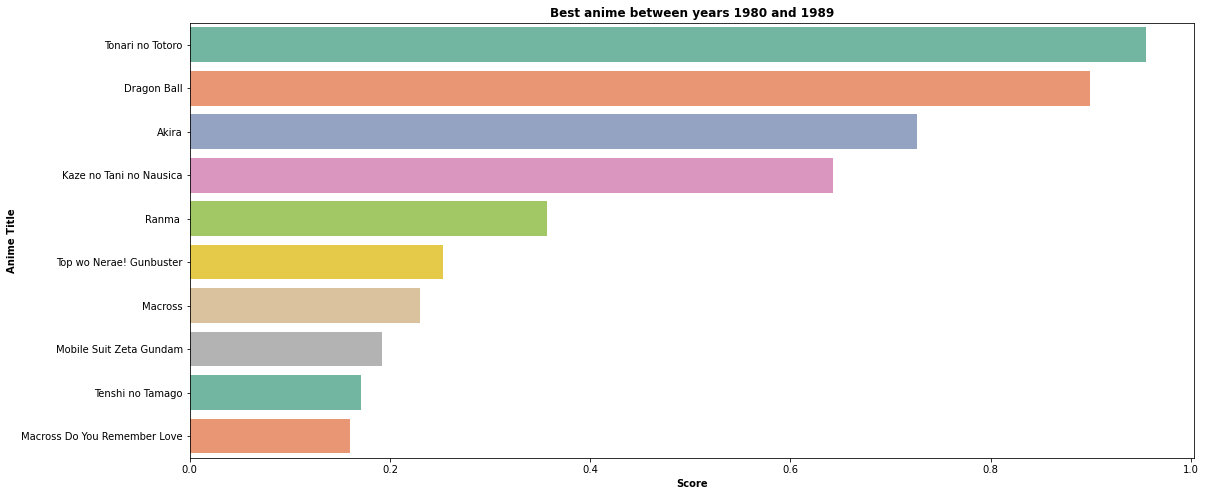

In [55]:
plot(data_scored_2,1980,1989)

### Group3 recommendation (1990 to 1999)

In [56]:
group_3 = create_group(1990,1999)
group_3.shape

(314, 6)

In [57]:
data_norm_3 = norm(group_3)

In [58]:
data_scored_3 = create_score(group_3,data_norm_3)

In [59]:
show_normalized(data_scored_3)

,title,norm_weighted_avg,norm_members,score
0,Cowboy Bebop,1.000000,0.982995,0.991498
2,One Piece,0.882454,1.000000,0.941227
36,Mononoke Hime,0.986182,0.705690,0.845936
3,Neon Genesis Evangelion,0.765508,0.891251,0.828379
50,Great Teacher Onizuka,0.886676,0.500706,0.693691


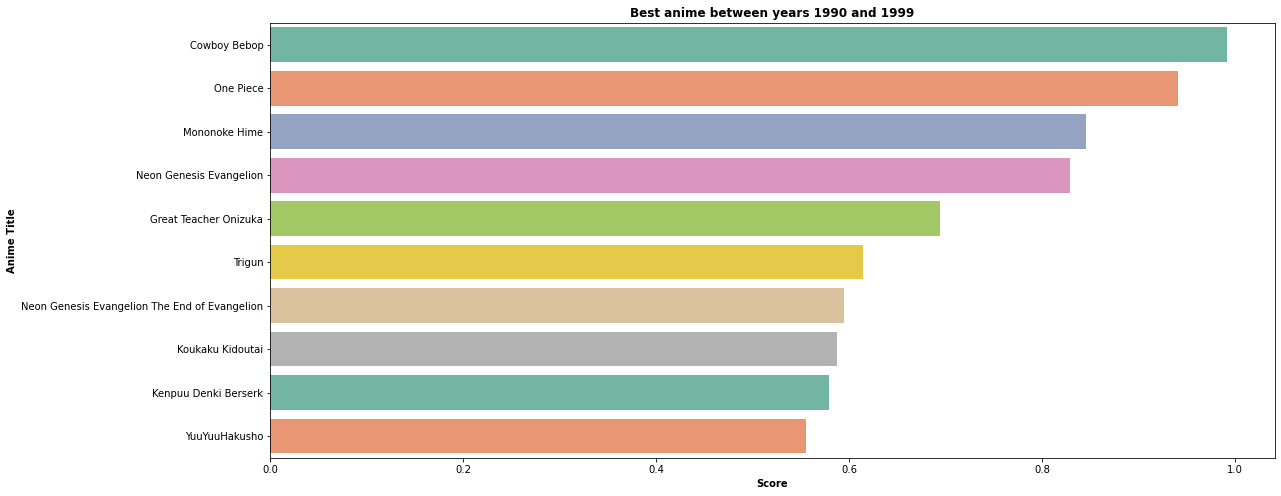

In [60]:
plot(data_scored_3,1990,1999)

### Group4 recommendation (2000 to 2009)

In [61]:
group_4 = create_group(2000,2009)
group_4.shape

(1053, 6)

In [62]:
data_norm_4 = norm(group_4)

In [63]:
data_scored_4 = create_score(group_4,data_norm_4)

In [64]:
show_normalized(data_scored_4)

,title,norm_weighted_avg,norm_members,score
478,Death Note,0.849451,1.000000,0.924726
918,Fullmetal Alchemist Brotherhood,1.000000,0.822624,0.911312
493,Code Geass Hangyaku no Lelouch,0.869581,0.677211,0.773396
721,Code Geass Hangyaku no Lelouch R2,0.907043,0.542843,0.724943
608,Tengen Toppa Gurren Lagann,0.843514,0.540230,0.691872


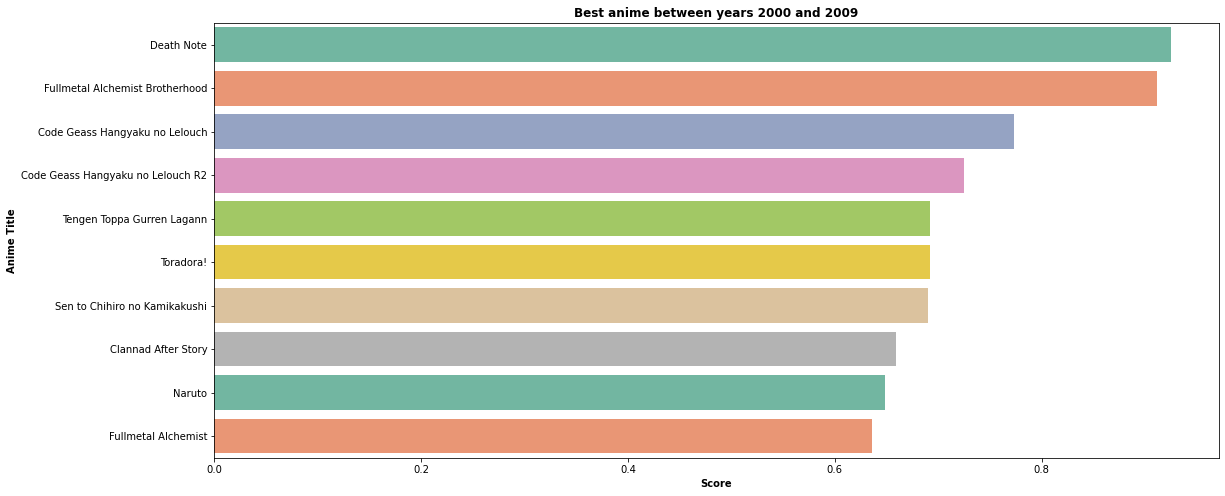

In [65]:
plot(data_scored_4,2000,2009)

### Group5 recommendation (2010 to 2019)

In [66]:
group_5 = create_group(2010,2019)
group_5.shape

(1688, 6)

In [67]:
data_norm_5 = norm(group_5)

In [68]:
data_scored_5 = create_score(group_5,data_norm_5)

In [69]:
show_normalized(data_scored_5)

,title,norm_weighted_avg,norm_members,score
497,Shingeki no Kyojin,0.839858,1.000000,0.919929
137,Steins;Gate,0.995954,0.749905,0.872929
1065,One Punch Man,0.896328,0.756912,0.826620
320,Sword Art Online,0.611746,0.967637,0.789691
1269,Kimi no Na wa.,1.000000,0.539819,0.769910


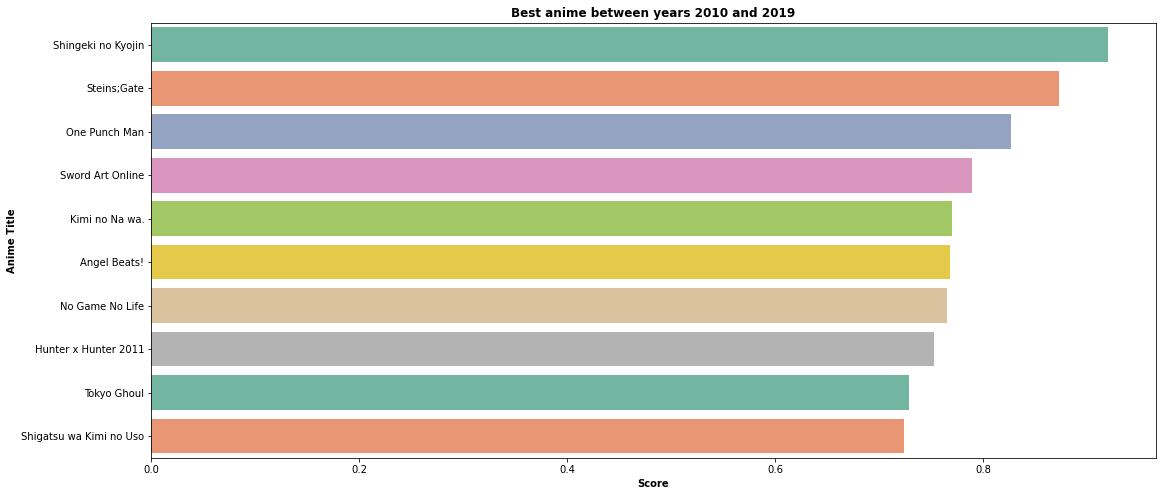

In [70]:
plot(data_scored_5,2010,2019)